In [88]:
# Trabalho 1

# O problema será identificar se o sinal de sonar obtido (60 valores reais,
# correspondentes a energia em diferentes bandas de frequência e ângulos de retorno) representa
# uma rocha (“R”) ou uma mina (“M”)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('sonar.train-data', header=None)
test_df  = pd.read_csv('sonar.test-data', header=None) 

In [3]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0264,0.0071,0.0342,0.0793,0.1043,0.0783,0.1417,0.1176,0.0453,0.0945,...,0.0214,0.0262,0.0177,0.0037,0.0068,0.0121,0.0077,0.0078,0.0066,M
1,0.0086,0.0215,0.0242,0.0445,0.0667,0.0771,0.0499,0.0906,0.1229,0.1185,...,0.0072,0.0054,0.0022,0.0016,0.0029,0.0058,0.0050,0.0024,0.0030,R
2,0.0394,0.0420,0.0446,0.0551,0.0597,0.1416,0.0956,0.0802,0.1618,0.2558,...,0.0146,0.0040,0.0114,0.0032,0.0062,0.0101,0.0068,0.0053,0.0087,M
3,0.0095,0.0308,0.0539,0.0411,0.0613,0.1039,0.1016,0.1394,0.2592,0.3745,...,0.0181,0.0019,0.0102,0.0133,0.0040,0.0042,0.0030,0.0031,0.0033,M
4,0.0310,0.0221,0.0433,0.0191,0.0964,0.1827,0.1106,0.1702,0.2804,0.4432,...,0.0204,0.0059,0.0053,0.0079,0.0037,0.0015,0.0056,0.0067,0.0054,M


In [4]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0363,0.0478,0.0298,0.0210,0.1409,0.1916,0.1349,0.1613,0.1703,0.1444,...,0.0115,0.0190,0.0055,0.0096,0.0050,0.0066,0.0114,0.0073,0.0033,M
1,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044,M
2,0.0132,0.0080,0.0188,0.0141,0.0436,0.0668,0.0609,0.0131,0.0899,0.0922,...,0.0044,0.0028,0.0021,0.0022,0.0048,0.0138,0.0140,0.0028,0.0064,R
3,0.0231,0.0315,0.0170,0.0226,0.0410,0.0116,0.0223,0.0805,0.2365,0.2461,...,0.0125,0.0036,0.0123,0.0043,0.0114,0.0052,0.0091,0.0008,0.0092,M
4,0.0015,0.0186,0.0289,0.0195,0.0515,0.0817,0.1005,0.0124,0.1168,0.1476,...,0.0108,0.0075,0.0089,0.0036,0.0029,0.0013,0.0010,0.0032,0.0047,M


In [5]:
X_train = train_df.iloc[:,:-1].values   # Independent variables
y_train = train_df.iloc[:, -1].values   # Dependent variables (classes)

X_test = test_df.iloc[:,:-1].values     # Independent variables
y_test = test_df.iloc[:, -1].values     # Dependent variables (classes)

print ('X_train shape:', X_train.shape)
print ('y_train shape:', y_train.shape)
print ('X_test shape:', X_test.shape)
print ('y_test shape:', y_test.shape)

X_train shape: (145, 60)
y_train shape: (145,)
X_test shape: (63, 60)
y_test shape: (63,)


In [6]:
train_df[60].value_counts()

M    81
R    64
Name: 60, dtype: int64

In [9]:
cleanup_nums = {60: {"M": 1.0, "R": 0.0}}

train_df.replace(cleanup_nums, inplace=True)
test_df.replace(cleanup_nums, inplace=True)

print (train_df.head())
print (test_df.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0264  0.0071  0.0342  0.0793  0.1043  0.0783  0.1417  0.1176  0.0453   
1  0.0086  0.0215  0.0242  0.0445  0.0667  0.0771  0.0499  0.0906  0.1229   
2  0.0394  0.0420  0.0446  0.0551  0.0597  0.1416  0.0956  0.0802  0.1618   
3  0.0095  0.0308  0.0539  0.0411  0.0613  0.1039  0.1016  0.1394  0.2592   
4  0.0310  0.0221  0.0433  0.0191  0.0964  0.1827  0.1106  0.1702  0.2804   

       9  ...       51      52      53      54      55      56      57  \
0  0.0945 ...   0.0214  0.0262  0.0177  0.0037  0.0068  0.0121  0.0077   
1  0.1185 ...   0.0072  0.0054  0.0022  0.0016  0.0029  0.0058  0.0050   
2  0.2558 ...   0.0146  0.0040  0.0114  0.0032  0.0062  0.0101  0.0068   
3  0.3745 ...   0.0181  0.0019  0.0102  0.0133  0.0040  0.0042  0.0030   
4  0.4432 ...   0.0204  0.0059  0.0053  0.0079  0.0037  0.0015  0.0056   

       58      59   60  
0  0.0078  0.0066  1.0  
1  0.0024  0.0030  0.0  
2  0.0053  0.0087

---

In [104]:
# Teste SVM
from sklearn import svm

SVM_clf = svm.SVC(gamma='scale').fit(X_train, y_train)
y_pred  = SVM_clf.predict(X_test)

C:\Users\mathe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: must be real number, not str

In [43]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm      = confusion_matrix(y_test, y_pred)
cr      = classification_report(y_test, y_pred)

print (cm)
print (cr)

[[24  6]
 [13 20]]
             precision    recall  f1-score   support

          M       0.65      0.80      0.72        30
          R       0.77      0.61      0.68        33

avg / total       0.71      0.70      0.70        63



---

Epoch 1 Error: 61.000
Epoch 2 Error: 55.000
Epoch 3 Error: 45.000
Epoch 4 Error: 48.000
Epoch 5 Error: 45.000
Epoch 6 Error: 42.000
Epoch 7 Error: 47.000
Epoch 8 Error: 50.000
Epoch 9 Error: 38.000
Epoch 10 Error: 41.000
Epoch 11 Error: 48.000
Epoch 12 Error: 39.000
Epoch 13 Error: 41.000
Epoch 14 Error: 39.000
Epoch 15 Error: 42.000
Epoch 16 Error: 42.000
Epoch 17 Error: 42.000
Epoch 18 Error: 41.000
Epoch 19 Error: 44.000
Epoch 20 Error: 47.000
Epoch 21 Error: 46.000
Epoch 22 Error: 36.000
Epoch 23 Error: 48.000
Epoch 24 Error: 38.000
Epoch 25 Error: 40.000
Epoch 26 Error: 35.000
Epoch 27 Error: 34.000
Epoch 28 Error: 41.000
Epoch 29 Error: 37.000
Epoch 30 Error: 39.000
Epoch 31 Error: 36.000
Epoch 32 Error: 40.000
Epoch 33 Error: 36.000
Epoch 34 Error: 34.000
Epoch 35 Error: 36.000
Epoch 36 Error: 38.000
Epoch 37 Error: 32.000
Epoch 38 Error: 26.000
Epoch 39 Error: 40.000
Epoch 40 Error: 35.000
Epoch 41 Error: 37.000
Epoch 42 Error: 37.000
Epoch 43 Error: 40.000
Epoch 44 Error: 36.0

Epoch 350 Error: 21.000
Epoch 351 Error: 32.000
Epoch 352 Error: 28.000
Epoch 353 Error: 22.000
Epoch 354 Error: 31.000
Epoch 355 Error: 24.000
Epoch 356 Error: 24.000
Epoch 357 Error: 28.000
Epoch 358 Error: 24.000
Epoch 359 Error: 22.000
Epoch 360 Error: 37.000
Epoch 361 Error: 28.000
Epoch 362 Error: 22.000
Epoch 363 Error: 23.000
Epoch 364 Error: 28.000
Epoch 365 Error: 24.000
Epoch 366 Error: 22.000
Epoch 367 Error: 24.000
Epoch 368 Error: 28.000
Epoch 369 Error: 24.000
Epoch 370 Error: 23.000
Epoch 371 Error: 37.000
Epoch 372 Error: 26.000
Epoch 373 Error: 30.000
Epoch 374 Error: 20.000
Epoch 375 Error: 28.000
Epoch 376 Error: 32.000
Epoch 377 Error: 26.000
Epoch 378 Error: 30.000
Epoch 379 Error: 28.000
Epoch 380 Error: 26.000
Epoch 381 Error: 19.000
Epoch 382 Error: 35.000
Epoch 383 Error: 25.000
Epoch 384 Error: 28.000
Epoch 385 Error: 28.000
Epoch 386 Error: 26.000
Epoch 387 Error: 33.000
Epoch 388 Error: 25.000
Epoch 389 Error: 26.000
Epoch 390 Error: 22.000
Epoch 391 Error:

Epoch 696 Error: 26.000
Epoch 697 Error: 24.000
Epoch 698 Error: 18.000
Epoch 699 Error: 18.000
Epoch 700 Error: 22.000
Epoch 701 Error: 20.000
Epoch 702 Error: 18.000
Epoch 703 Error: 26.000
Epoch 704 Error: 27.000
Epoch 705 Error: 25.000
Epoch 706 Error: 16.000
Epoch 707 Error: 16.000
Epoch 708 Error: 25.000
Epoch 709 Error: 22.000
Epoch 710 Error: 26.000
Epoch 711 Error: 26.000
Epoch 712 Error: 28.000
Epoch 713 Error: 25.000
Epoch 714 Error: 16.000
Epoch 715 Error: 20.000
Epoch 716 Error: 26.000
Epoch 717 Error: 24.000
Epoch 718 Error: 22.000
Epoch 719 Error: 24.000
Epoch 720 Error: 29.000
Epoch 721 Error: 27.000
Epoch 722 Error: 22.000
Epoch 723 Error: 18.000
Epoch 724 Error: 23.000
Epoch 725 Error: 28.000
Epoch 726 Error: 26.000
Epoch 727 Error: 22.000
Epoch 728 Error: 24.000
Epoch 729 Error: 26.000
Epoch 730 Error: 22.000
Epoch 731 Error: 24.000
Epoch 732 Error: 23.000
Epoch 733 Error: 26.000
Epoch 734 Error: 28.000
Epoch 735 Error: 25.000
Epoch 736 Error: 20.000
Epoch 737 Error:

Epoch 1043 Error: 25.000
Epoch 1044 Error: 26.000
Epoch 1045 Error: 25.000
Epoch 1046 Error: 25.000
Epoch 1047 Error: 18.000
Epoch 1048 Error: 22.000
Epoch 1049 Error: 21.000
Epoch 1050 Error: 21.000
Epoch 1051 Error: 24.000
Epoch 1052 Error: 22.000
Epoch 1053 Error: 20.000
Epoch 1054 Error: 22.000
Epoch 1055 Error: 24.000
Epoch 1056 Error: 21.000
Epoch 1057 Error: 21.000
Epoch 1058 Error: 23.000
Epoch 1059 Error: 19.000
Epoch 1060 Error: 16.000
Epoch 1061 Error: 20.000
Epoch 1062 Error: 20.000
Epoch 1063 Error: 23.000
Epoch 1064 Error: 26.000
Epoch 1065 Error: 26.000
Epoch 1066 Error: 14.000
Epoch 1067 Error: 25.000
Epoch 1068 Error: 26.000
Epoch 1069 Error: 22.000
Epoch 1070 Error: 25.000
Epoch 1071 Error: 25.000
Epoch 1072 Error: 20.000
Epoch 1073 Error: 23.000
Epoch 1074 Error: 24.000
Epoch 1075 Error: 28.000
Epoch 1076 Error: 18.000
Epoch 1077 Error: 20.000
Epoch 1078 Error: 24.000
Epoch 1079 Error: 20.000
Epoch 1080 Error: 20.000
Epoch 1081 Error: 20.000
Epoch 1082 Error: 20.000


Epoch 1388 Error: 24.000
Epoch 1389 Error: 20.000
Epoch 1390 Error: 22.000
Epoch 1391 Error: 22.000
Epoch 1392 Error: 26.000
Epoch 1393 Error: 24.000
Epoch 1394 Error: 23.000
Epoch 1395 Error: 19.000
Epoch 1396 Error: 16.000
Epoch 1397 Error: 20.000
Epoch 1398 Error: 20.000
Epoch 1399 Error: 24.000
Epoch 1400 Error: 24.000
Epoch 1401 Error: 18.000
Epoch 1402 Error: 26.000
Epoch 1403 Error: 16.000
Epoch 1404 Error: 20.000
Epoch 1405 Error: 14.000
Epoch 1406 Error: 22.000
Epoch 1407 Error: 20.000
Epoch 1408 Error: 22.000
Epoch 1409 Error: 20.000
Epoch 1410 Error: 22.000
Epoch 1411 Error: 22.000
Epoch 1412 Error: 18.000
Epoch 1413 Error: 20.000
Epoch 1414 Error: 14.000
Epoch 1415 Error: 17.000
Epoch 1416 Error: 21.000
Epoch 1417 Error: 20.000
Epoch 1418 Error: 24.000
Epoch 1419 Error: 20.000
Epoch 1420 Error: 20.000
Epoch 1421 Error: 14.000
Epoch 1422 Error: 22.000
Epoch 1423 Error: 20.000
Epoch 1424 Error: 20.000
Epoch 1425 Error: 22.000
Epoch 1426 Error: 22.000
Epoch 1427 Error: 18.000


Epoch 1718 Error: 20.000
Epoch 1719 Error: 18.000
Epoch 1720 Error: 21.000
Epoch 1721 Error: 24.000
Epoch 1722 Error: 22.000
Epoch 1723 Error: 24.000
Epoch 1724 Error: 22.000
Epoch 1725 Error: 22.000
Epoch 1726 Error: 18.000
Epoch 1727 Error: 24.000
Epoch 1728 Error: 22.000
Epoch 1729 Error: 22.000
Epoch 1730 Error: 26.000
Epoch 1731 Error: 22.000
Epoch 1732 Error: 18.000
Epoch 1733 Error: 24.000
Epoch 1734 Error: 22.000
Epoch 1735 Error: 22.000
Epoch 1736 Error: 13.000
Epoch 1737 Error: 22.000
Epoch 1738 Error: 16.000
Epoch 1739 Error: 14.000
Epoch 1740 Error: 21.000
Epoch 1741 Error: 24.000
Epoch 1742 Error: 24.000
Epoch 1743 Error: 18.000
Epoch 1744 Error: 24.000
Epoch 1745 Error: 24.000
Epoch 1746 Error: 18.000
Epoch 1747 Error: 18.000
Epoch 1748 Error: 16.000
Epoch 1749 Error: 24.000
Epoch 1750 Error: 16.000
Epoch 1751 Error: 20.000
Epoch 1752 Error: 20.000
Epoch 1753 Error: 20.000
Epoch 1754 Error: 24.000
Epoch 1755 Error: 24.000
Epoch 1756 Error: 22.000
Epoch 1757 Error: 24.000


Epoch 2060 Error: 20.000
Epoch 2061 Error: 16.000
Epoch 2062 Error: 18.000
Epoch 2063 Error: 22.000
Epoch 2064 Error: 16.000
Epoch 2065 Error: 20.000
Epoch 2066 Error: 24.000
Epoch 2067 Error: 14.000
Epoch 2068 Error: 14.000
Epoch 2069 Error: 18.000
Epoch 2070 Error: 22.000
Epoch 2071 Error: 14.000
Epoch 2072 Error: 19.000
Epoch 2073 Error: 18.000
Epoch 2074 Error: 21.000
Epoch 2075 Error: 22.000
Epoch 2076 Error: 20.000
Epoch 2077 Error: 20.000
Epoch 2078 Error: 16.000
Epoch 2079 Error: 14.000
Epoch 2080 Error: 19.000
Epoch 2081 Error: 22.000
Epoch 2082 Error: 28.000
Epoch 2083 Error: 17.000
Epoch 2084 Error: 25.000
Epoch 2085 Error: 22.000
Epoch 2086 Error: 19.000
Epoch 2087 Error: 17.000
Epoch 2088 Error: 24.000
Epoch 2089 Error: 18.000
Epoch 2090 Error: 22.000
Epoch 2091 Error: 23.000
Epoch 2092 Error: 19.000
Epoch 2093 Error: 18.000
Epoch 2094 Error: 19.000
Epoch 2095 Error: 21.000
Epoch 2096 Error: 16.000
Epoch 2097 Error: 22.000
Epoch 2098 Error: 19.000
Epoch 2099 Error: 15.000


Epoch 2399 Error: 24.000
Epoch 2400 Error: 12.000
Epoch 2401 Error: 21.000
Epoch 2402 Error: 15.000
Epoch 2403 Error: 19.000
Epoch 2404 Error: 21.000
Epoch 2405 Error: 14.000
Epoch 2406 Error: 14.000
Epoch 2407 Error: 17.000
Epoch 2408 Error: 16.000
Epoch 2409 Error: 13.000
Epoch 2410 Error: 20.000
Epoch 2411 Error: 16.000
Epoch 2412 Error: 18.000
Epoch 2413 Error: 14.000
Epoch 2414 Error: 21.000
Epoch 2415 Error: 17.000
Epoch 2416 Error: 25.000
Epoch 2417 Error: 17.000
Epoch 2418 Error: 12.000
Epoch 2419 Error: 17.000
Epoch 2420 Error: 19.000
Epoch 2421 Error: 26.000
Epoch 2422 Error: 14.000
Epoch 2423 Error: 22.000
Epoch 2424 Error: 14.000
Epoch 2425 Error: 14.000
Epoch 2426 Error: 18.000
Epoch 2427 Error: 19.000
Epoch 2428 Error: 12.000
Epoch 2429 Error: 15.000
Epoch 2430 Error: 13.000
Epoch 2431 Error: 12.000
Epoch 2432 Error: 12.000
Epoch 2433 Error: 12.000
Epoch 2434 Error: 16.000
Epoch 2435 Error: 14.000
Epoch 2436 Error: 16.000
Epoch 2437 Error: 10.000
Epoch 2438 Error: 14.000


Epoch 2740 Error: 16.000
Epoch 2741 Error: 19.000
Epoch 2742 Error: 12.000
Epoch 2743 Error: 21.000
Epoch 2744 Error: 24.000
Epoch 2745 Error: 14.000
Epoch 2746 Error: 12.000
Epoch 2747 Error: 16.000
Epoch 2748 Error: 16.000
Epoch 2749 Error: 14.000
Epoch 2750 Error: 20.000
Epoch 2751 Error: 13.000
Epoch 2752 Error: 20.000
Epoch 2753 Error: 15.000
Epoch 2754 Error: 18.000
Epoch 2755 Error: 10.000
Epoch 2756 Error: 18.000
Epoch 2757 Error: 12.000
Epoch 2758 Error: 10.000
Epoch 2759 Error: 14.000
Epoch 2760 Error: 18.000
Epoch 2761 Error: 12.000
Epoch 2762 Error: 14.000
Epoch 2763 Error: 14.000
Epoch 2764 Error: 22.000
Epoch 2765 Error: 19.000
Epoch 2766 Error: 20.000
Epoch 2767 Error: 20.000
Epoch 2768 Error: 14.000
Epoch 2769 Error: 14.000
Epoch 2770 Error: 18.000
Epoch 2771 Error: 22.000
Epoch 2772 Error: 18.000
Epoch 2773 Error: 18.000
Epoch 2774 Error: 20.000
Epoch 2775 Error: 17.000
Epoch 2776 Error: 19.000
Epoch 2777 Error: 11.000
Epoch 2778 Error: 23.000
Epoch 2779 Error: 16.000


Epoch 3085 Error: 17.000
Epoch 3086 Error: 20.000
Epoch 3087 Error: 24.000
Epoch 3088 Error: 12.000
Epoch 3089 Error: 16.000
Epoch 3090 Error: 22.000
Epoch 3091 Error: 13.000
Epoch 3092 Error: 19.000
Epoch 3093 Error: 12.000
Epoch 3094 Error: 16.000
Epoch 3095 Error: 14.000
Epoch 3096 Error: 14.000
Epoch 3097 Error: 12.000
Epoch 3098 Error: 17.000
Epoch 3099 Error: 18.000
Epoch 3100 Error: 13.000
Epoch 3101 Error: 17.000
Epoch 3102 Error: 20.000
Epoch 3103 Error: 14.000
Epoch 3104 Error: 15.000
Epoch 3105 Error: 18.000
Epoch 3106 Error: 16.000
Epoch 3107 Error: 18.000
Epoch 3108 Error: 19.000
Epoch 3109 Error: 19.000
Epoch 3110 Error: 17.000
Epoch 3111 Error: 16.000
Epoch 3112 Error: 18.000
Epoch 3113 Error: 18.000
Epoch 3114 Error: 17.000
Epoch 3115 Error: 16.000
Epoch 3116 Error: 12.000
Epoch 3117 Error: 16.000
Epoch 3118 Error: 12.000
Epoch 3119 Error: 14.000
Epoch 3120 Error: 22.000
Epoch 3121 Error: 22.000
Epoch 3122 Error: 20.000
Epoch 3123 Error: 14.000
Epoch 3124 Error: 18.000


Epoch 3418 Error: 16.000
Epoch 3419 Error: 16.000
Epoch 3420 Error: 17.000
Epoch 3421 Error: 18.000
Epoch 3422 Error: 15.000
Epoch 3423 Error: 16.000
Epoch 3424 Error: 19.000
Epoch 3425 Error: 18.000
Epoch 3426 Error: 14.000
Epoch 3427 Error: 13.000
Epoch 3428 Error: 17.000
Epoch 3429 Error: 16.000
Epoch 3430 Error: 15.000
Epoch 3431 Error: 16.000
Epoch 3432 Error: 18.000
Epoch 3433 Error: 18.000
Epoch 3434 Error: 10.000
Epoch 3435 Error: 10.000
Epoch 3436 Error: 14.000
Epoch 3437 Error: 14.000
Epoch 3438 Error: 12.000
Epoch 3439 Error: 15.000
Epoch 3440 Error: 16.000
Epoch 3441 Error: 17.000
Epoch 3442 Error: 16.000
Epoch 3443 Error: 12.000
Epoch 3444 Error: 21.000
Epoch 3445 Error: 17.000
Epoch 3446 Error: 19.000
Epoch 3447 Error: 18.000
Epoch 3448 Error: 17.000
Epoch 3449 Error: 14.000
Epoch 3450 Error: 16.000
Epoch 3451 Error: 16.000
Epoch 3452 Error: 16.000
Epoch 3453 Error: 14.000
Epoch 3454 Error: 14.000
Epoch 3455 Error: 12.000
Epoch 3456 Error: 16.000
Epoch 3457 Error: 16.000


Epoch 3757 Error: 14.000
Epoch 3758 Error: 16.000
Epoch 3759 Error: 18.000
Epoch 3760 Error: 20.000
Epoch 3761 Error: 10.000
Epoch 3762 Error: 10.000
Epoch 3763 Error: 14.000
Epoch 3764 Error: 16.000
Epoch 3765 Error: 16.000
Epoch 3766 Error: 16.000
Epoch 3767 Error: 12.000
Epoch 3768 Error: 18.000
Epoch 3769 Error: 19.000
Epoch 3770 Error: 16.000
Epoch 3771 Error: 17.000
Epoch 3772 Error: 17.000
Epoch 3773 Error: 15.000
Epoch 3774 Error: 16.000
Epoch 3775 Error: 18.000
Epoch 3776 Error: 10.000
Epoch 3777 Error: 16.000
Epoch 3778 Error: 11.000
Epoch 3779 Error: 19.000
Epoch 3780 Error: 15.000
Epoch 3781 Error: 16.000
Epoch 3782 Error: 14.000
Epoch 3783 Error: 12.000
Epoch 3784 Error: 14.000
Epoch 3785 Error: 18.000
Epoch 3786 Error: 18.000
Epoch 3787 Error: 14.000
Epoch 3788 Error: 8.000
Epoch 3789 Error: 14.000
Epoch 3790 Error: 10.000
Epoch 3791 Error: 14.000
Epoch 3792 Error: 12.000
Epoch 3793 Error: 12.000
Epoch 3794 Error: 16.000
Epoch 3795 Error: 8.000
Epoch 3796 Error: 12.000
Ep

Epoch 4101 Error: 18.000
Epoch 4102 Error: 19.000
Epoch 4103 Error: 20.000
Epoch 4104 Error: 14.000
Epoch 4105 Error: 16.000
Epoch 4106 Error: 14.000
Epoch 4107 Error: 22.000
Epoch 4108 Error: 15.000
Epoch 4109 Error: 12.000
Epoch 4110 Error: 10.000
Epoch 4111 Error: 16.000
Epoch 4112 Error: 18.000
Epoch 4113 Error: 21.000
Epoch 4114 Error: 22.000
Epoch 4115 Error: 15.000
Epoch 4116 Error: 19.000
Epoch 4117 Error: 14.000
Epoch 4118 Error: 19.000
Epoch 4119 Error: 23.000
Epoch 4120 Error: 20.000
Epoch 4121 Error: 14.000
Epoch 4122 Error: 17.000
Epoch 4123 Error: 12.000
Epoch 4124 Error: 12.000
Epoch 4125 Error: 12.000
Epoch 4126 Error: 18.000
Epoch 4127 Error: 18.000
Epoch 4128 Error: 14.000
Epoch 4129 Error: 14.000
Epoch 4130 Error: 14.000
Epoch 4131 Error: 17.000
Epoch 4132 Error: 16.000
Epoch 4133 Error: 14.000
Epoch 4134 Error: 12.000
Epoch 4135 Error: 14.000
Epoch 4136 Error: 16.000
Epoch 4137 Error: 14.000
Epoch 4138 Error: 14.000
Epoch 4139 Error: 16.000
Epoch 4140 Error: 14.000


Epoch 4446 Error: 12.000
Epoch 4447 Error: 16.000
Epoch 4448 Error: 14.000
Epoch 4449 Error: 14.000
Epoch 4450 Error: 12.000
Epoch 4451 Error: 18.000
Epoch 4452 Error: 12.000
Epoch 4453 Error: 14.000
Epoch 4454 Error: 10.000
Epoch 4455 Error: 14.000
Epoch 4456 Error: 15.000
Epoch 4457 Error: 16.000
Epoch 4458 Error: 17.000
Epoch 4459 Error: 16.000
Epoch 4460 Error: 12.000
Epoch 4461 Error: 16.000
Epoch 4462 Error: 14.000
Epoch 4463 Error: 14.000
Epoch 4464 Error: 12.000
Epoch 4465 Error: 20.000
Epoch 4466 Error: 15.000
Epoch 4467 Error: 20.000
Epoch 4468 Error: 12.000
Epoch 4469 Error: 13.000
Epoch 4470 Error: 16.000
Epoch 4471 Error: 12.000
Epoch 4472 Error: 10.000
Epoch 4473 Error: 10.000
Epoch 4474 Error: 14.000
Epoch 4475 Error: 17.000
Epoch 4476 Error: 15.000
Epoch 4477 Error: 21.000
Epoch 4478 Error: 9.000
Epoch 4479 Error: 19.000
Epoch 4480 Error: 11.000
Epoch 4481 Error: 17.000
Epoch 4482 Error: 18.000
Epoch 4483 Error: 19.000
Epoch 4484 Error: 18.000
Epoch 4485 Error: 10.000
E

Epoch 4789 Error: 19.000
Epoch 4790 Error: 16.000
Epoch 4791 Error: 16.000
Epoch 4792 Error: 16.000
Epoch 4793 Error: 12.000
Epoch 4794 Error: 18.000
Epoch 4795 Error: 20.000
Epoch 4796 Error: 16.000
Epoch 4797 Error: 14.000
Epoch 4798 Error: 12.000
Epoch 4799 Error: 12.000
Epoch 4800 Error: 10.000
Epoch 4801 Error: 12.000
Epoch 4802 Error: 17.000
Epoch 4803 Error: 14.000
Epoch 4804 Error: 10.000
Epoch 4805 Error: 12.000
Epoch 4806 Error: 12.000
Epoch 4807 Error: 16.000
Epoch 4808 Error: 16.000
Epoch 4809 Error: 14.000
Epoch 4810 Error: 14.000
Epoch 4811 Error: 10.000
Epoch 4812 Error: 8.000
Epoch 4813 Error: 14.000
Epoch 4814 Error: 16.000
Epoch 4815 Error: 14.000
Epoch 4816 Error: 14.000
Epoch 4817 Error: 7.000
Epoch 4818 Error: 18.000
Epoch 4819 Error: 18.000
Epoch 4820 Error: 15.000
Epoch 4821 Error: 14.000
Epoch 4822 Error: 17.000
Epoch 4823 Error: 13.000
Epoch 4824 Error: 14.000
Epoch 4825 Error: 13.000
Epoch 4826 Error: 17.000
Epoch 4827 Error: 18.000
Epoch 4828 Error: 10.000
Ep

Epoch 5132 Error: 7.000
Epoch 5133 Error: 10.000
Epoch 5134 Error: 16.000
Epoch 5135 Error: 12.000
Epoch 5136 Error: 16.000
Epoch 5137 Error: 14.000
Epoch 5138 Error: 16.000
Epoch 5139 Error: 18.000
Epoch 5140 Error: 12.000
Epoch 5141 Error: 16.000
Epoch 5142 Error: 14.000
Epoch 5143 Error: 10.000
Epoch 5144 Error: 13.000
Epoch 5145 Error: 11.000
Epoch 5146 Error: 11.000
Epoch 5147 Error: 13.000
Epoch 5148 Error: 17.000
Epoch 5149 Error: 19.000
Epoch 5150 Error: 11.000
Epoch 5151 Error: 8.000
Epoch 5152 Error: 17.000
Epoch 5153 Error: 18.000
Epoch 5154 Error: 11.000
Epoch 5155 Error: 13.000
Epoch 5156 Error: 14.000
Epoch 5157 Error: 14.000
Epoch 5158 Error: 14.000
Epoch 5159 Error: 12.000
Epoch 5160 Error: 16.000
Epoch 5161 Error: 14.000
Epoch 5162 Error: 14.000
Epoch 5163 Error: 12.000
Epoch 5164 Error: 18.000
Epoch 5165 Error: 16.000
Epoch 5166 Error: 15.000
Epoch 5167 Error: 16.000
Epoch 5168 Error: 13.000
Epoch 5169 Error: 11.000
Epoch 5170 Error: 10.000
Epoch 5171 Error: 15.000
Ep

Epoch 5475 Error: 16.000
Epoch 5476 Error: 16.000
Epoch 5477 Error: 14.000
Epoch 5478 Error: 12.000
Epoch 5479 Error: 16.000
Epoch 5480 Error: 16.000
Epoch 5481 Error: 14.000
Epoch 5482 Error: 18.000
Epoch 5483 Error: 13.000
Epoch 5484 Error: 18.000
Epoch 5485 Error: 14.000
Epoch 5486 Error: 18.000
Epoch 5487 Error: 14.000
Epoch 5488 Error: 14.000
Epoch 5489 Error: 16.000
Epoch 5490 Error: 11.000
Epoch 5491 Error: 13.000
Epoch 5492 Error: 12.000
Epoch 5493 Error: 18.000
Epoch 5494 Error: 14.000
Epoch 5495 Error: 10.000
Epoch 5496 Error: 10.000
Epoch 5497 Error: 18.000
Epoch 5498 Error: 18.000
Epoch 5499 Error: 12.000
Epoch 5500 Error: 12.000
Epoch 5501 Error: 18.000
Epoch 5502 Error: 18.000
Epoch 5503 Error: 12.000
Epoch 5504 Error: 14.000
Epoch 5505 Error: 14.000
Epoch 5506 Error: 16.000
Epoch 5507 Error: 12.000
Epoch 5508 Error: 12.000
Epoch 5509 Error: 18.000
Epoch 5510 Error: 20.000
Epoch 5511 Error: 14.000
Epoch 5512 Error: 14.000
Epoch 5513 Error: 12.000
Epoch 5514 Error: 14.000


Epoch 5804 Error: 16.000
Epoch 5805 Error: 12.000
Epoch 5806 Error: 15.000
Epoch 5807 Error: 13.000
Epoch 5808 Error: 11.000
Epoch 5809 Error: 14.000
Epoch 5810 Error: 12.000
Epoch 5811 Error: 18.000
Epoch 5812 Error: 14.000
Epoch 5813 Error: 14.000
Epoch 5814 Error: 10.000
Epoch 5815 Error: 17.000
Epoch 5816 Error: 13.000
Epoch 5817 Error: 10.000
Epoch 5818 Error: 11.000
Epoch 5819 Error: 9.000
Epoch 5820 Error: 18.000
Epoch 5821 Error: 14.000
Epoch 5822 Error: 16.000
Epoch 5823 Error: 16.000
Epoch 5824 Error: 12.000
Epoch 5825 Error: 12.000
Epoch 5826 Error: 16.000
Epoch 5827 Error: 12.000
Epoch 5828 Error: 18.000
Epoch 5829 Error: 12.000
Epoch 5830 Error: 16.000
Epoch 5831 Error: 14.000
Epoch 5832 Error: 15.000
Epoch 5833 Error: 14.000
Epoch 5834 Error: 14.000
Epoch 5835 Error: 12.000
Epoch 5836 Error: 18.000
Epoch 5837 Error: 12.000
Epoch 5838 Error: 12.000
Epoch 5839 Error: 16.000
Epoch 5840 Error: 19.000
Epoch 5841 Error: 19.000
Epoch 5842 Error: 18.000
Epoch 5843 Error: 10.000
E

Epoch 6150 Error: 12.000
Epoch 6151 Error: 13.000
Epoch 6152 Error: 14.000
Epoch 6153 Error: 14.000
Epoch 6154 Error: 16.000
Epoch 6155 Error: 14.000
Epoch 6156 Error: 14.000
Epoch 6157 Error: 16.000
Epoch 6158 Error: 16.000
Epoch 6159 Error: 14.000
Epoch 6160 Error: 12.000
Epoch 6161 Error: 16.000
Epoch 6162 Error: 12.000
Epoch 6163 Error: 16.000
Epoch 6164 Error: 16.000
Epoch 6165 Error: 9.000
Epoch 6166 Error: 14.000
Epoch 6167 Error: 16.000
Epoch 6168 Error: 12.000
Epoch 6169 Error: 12.000
Epoch 6170 Error: 14.000
Epoch 6171 Error: 16.000
Epoch 6172 Error: 16.000
Epoch 6173 Error: 12.000
Epoch 6174 Error: 15.000
Epoch 6175 Error: 18.000
Epoch 6176 Error: 20.000
Epoch 6177 Error: 14.000
Epoch 6178 Error: 13.000
Epoch 6179 Error: 16.000
Epoch 6180 Error: 10.000
Epoch 6181 Error: 14.000
Epoch 6182 Error: 16.000
Epoch 6183 Error: 12.000
Epoch 6184 Error: 18.000
Epoch 6185 Error: 16.000
Epoch 6186 Error: 14.000
Epoch 6187 Error: 12.000
Epoch 6188 Error: 14.000
Epoch 6189 Error: 16.000
E

Epoch 6494 Error: 12.000
Epoch 6495 Error: 16.000
Epoch 6496 Error: 14.000
Epoch 6497 Error: 16.000
Epoch 6498 Error: 11.000
Epoch 6499 Error: 10.000
Epoch 6500 Error: 13.000
Epoch 6501 Error: 11.000
Epoch 6502 Error: 12.000
Epoch 6503 Error: 11.000
Epoch 6504 Error: 14.000
Epoch 6505 Error: 18.000
Epoch 6506 Error: 11.000
Epoch 6507 Error: 12.000
Epoch 6508 Error: 10.000
Epoch 6509 Error: 12.000
Epoch 6510 Error: 14.000
Epoch 6511 Error: 18.000
Epoch 6512 Error: 13.000
Epoch 6513 Error: 10.000
Epoch 6514 Error: 11.000
Epoch 6515 Error: 16.000
Epoch 6516 Error: 16.000
Epoch 6517 Error: 14.000
Epoch 6518 Error: 12.000
Epoch 6519 Error: 17.000
Epoch 6520 Error: 15.000
Epoch 6521 Error: 12.000
Epoch 6522 Error: 12.000
Epoch 6523 Error: 18.000
Epoch 6524 Error: 12.000
Epoch 6525 Error: 12.000
Epoch 6526 Error: 12.000
Epoch 6527 Error: 12.000
Epoch 6528 Error: 9.000
Epoch 6529 Error: 8.000
Epoch 6530 Error: 14.000
Epoch 6531 Error: 20.000
Epoch 6532 Error: 15.000
Epoch 6533 Error: 10.000
Ep

Epoch 6838 Error: 14.000
Epoch 6839 Error: 12.000
Epoch 6840 Error: 11.000
Epoch 6841 Error: 19.000
Epoch 6842 Error: 16.000
Epoch 6843 Error: 18.000
Epoch 6844 Error: 11.000
Epoch 6845 Error: 12.000
Epoch 6846 Error: 14.000
Epoch 6847 Error: 12.000
Epoch 6848 Error: 14.000
Epoch 6849 Error: 10.000
Epoch 6850 Error: 13.000
Epoch 6851 Error: 13.000
Epoch 6852 Error: 12.000
Epoch 6853 Error: 12.000
Epoch 6854 Error: 8.000
Epoch 6855 Error: 14.000
Epoch 6856 Error: 16.000
Epoch 6857 Error: 16.000
Epoch 6858 Error: 10.000
Epoch 6859 Error: 18.000
Epoch 6860 Error: 13.000
Epoch 6861 Error: 15.000
Epoch 6862 Error: 16.000
Epoch 6863 Error: 16.000
Epoch 6864 Error: 10.000
Epoch 6865 Error: 14.000
Epoch 6866 Error: 10.000
Epoch 6867 Error: 10.000
Epoch 6868 Error: 14.000
Epoch 6869 Error: 10.000
Epoch 6870 Error: 14.000
Epoch 6871 Error: 8.000
Epoch 6872 Error: 10.000
Epoch 6873 Error: 11.000
Epoch 6874 Error: 13.000
Epoch 6875 Error: 12.000
Epoch 6876 Error: 15.000
Epoch 6877 Error: 14.000
Ep

Epoch 7167 Error: 20.000
Epoch 7168 Error: 12.000
Epoch 7169 Error: 12.000
Epoch 7170 Error: 12.000
Epoch 7171 Error: 14.000
Epoch 7172 Error: 18.000
Epoch 7173 Error: 12.000
Epoch 7174 Error: 16.000
Epoch 7175 Error: 12.000
Epoch 7176 Error: 14.000
Epoch 7177 Error: 18.000
Epoch 7178 Error: 16.000
Epoch 7179 Error: 12.000
Epoch 7180 Error: 8.000
Epoch 7181 Error: 12.000
Epoch 7182 Error: 16.000
Epoch 7183 Error: 10.000
Epoch 7184 Error: 12.000
Epoch 7185 Error: 12.000
Epoch 7186 Error: 14.000
Epoch 7187 Error: 14.000
Epoch 7188 Error: 14.000
Epoch 7189 Error: 18.000
Epoch 7190 Error: 16.000
Epoch 7191 Error: 16.000
Epoch 7192 Error: 14.000
Epoch 7193 Error: 14.000
Epoch 7194 Error: 10.000
Epoch 7195 Error: 14.000
Epoch 7196 Error: 18.000
Epoch 7197 Error: 10.000
Epoch 7198 Error: 14.000
Epoch 7199 Error: 12.000
Epoch 7200 Error: 12.000
Epoch 7201 Error: 16.000
Epoch 7202 Error: 13.000
Epoch 7203 Error: 9.000
Epoch 7204 Error: 10.000
Epoch 7205 Error: 18.000
Epoch 7206 Error: 12.000
Ep

Epoch 7513 Error: 14.000
Epoch 7514 Error: 14.000
Epoch 7515 Error: 14.000
Epoch 7516 Error: 14.000
Epoch 7517 Error: 12.000
Epoch 7518 Error: 17.000
Epoch 7519 Error: 18.000
Epoch 7520 Error: 16.000
Epoch 7521 Error: 12.000
Epoch 7522 Error: 16.000
Epoch 7523 Error: 14.000
Epoch 7524 Error: 14.000
Epoch 7525 Error: 14.000
Epoch 7526 Error: 11.000
Epoch 7527 Error: 12.000
Epoch 7528 Error: 19.000
Epoch 7529 Error: 12.000
Epoch 7530 Error: 10.000
Epoch 7531 Error: 14.000
Epoch 7532 Error: 14.000
Epoch 7533 Error: 13.000
Epoch 7534 Error: 16.000
Epoch 7535 Error: 19.000
Epoch 7536 Error: 11.000
Epoch 7537 Error: 11.000
Epoch 7538 Error: 11.000
Epoch 7539 Error: 12.000
Epoch 7540 Error: 9.000
Epoch 7541 Error: 12.000
Epoch 7542 Error: 13.000
Epoch 7543 Error: 16.000
Epoch 7544 Error: 12.000
Epoch 7545 Error: 12.000
Epoch 7546 Error: 12.000
Epoch 7547 Error: 16.000
Epoch 7548 Error: 12.000
Epoch 7549 Error: 15.000
Epoch 7550 Error: 17.000
Epoch 7551 Error: 11.000
Epoch 7552 Error: 9.000
Ep

Epoch 7845 Error: 6.000
Epoch 7846 Error: 8.000
Epoch 7847 Error: 10.000
Epoch 7848 Error: 14.000
Epoch 7849 Error: 16.000
Epoch 7850 Error: 9.000
Epoch 7851 Error: 15.000
Epoch 7852 Error: 12.000
Epoch 7853 Error: 8.000
Epoch 7854 Error: 14.000
Epoch 7855 Error: 20.000
Epoch 7856 Error: 12.000
Epoch 7857 Error: 16.000
Epoch 7858 Error: 14.000
Epoch 7859 Error: 12.000
Epoch 7860 Error: 18.000
Epoch 7861 Error: 8.000
Epoch 7862 Error: 14.000
Epoch 7863 Error: 9.000
Epoch 7864 Error: 10.000
Epoch 7865 Error: 13.000
Epoch 7866 Error: 13.000
Epoch 7867 Error: 10.000
Epoch 7868 Error: 16.000
Epoch 7869 Error: 14.000
Epoch 7870 Error: 14.000
Epoch 7871 Error: 10.000
Epoch 7872 Error: 10.000
Epoch 7873 Error: 16.000
Epoch 7874 Error: 14.000
Epoch 7875 Error: 14.000
Epoch 7876 Error: 18.000
Epoch 7877 Error: 10.000
Epoch 7878 Error: 16.000
Epoch 7879 Error: 14.000
Epoch 7880 Error: 14.000
Epoch 7881 Error: 8.000
Epoch 7882 Error: 10.000
Epoch 7883 Error: 14.000
Epoch 7884 Error: 16.000
Epoch 7

Epoch 8193 Error: 10.000
Epoch 8194 Error: 12.000
Epoch 8195 Error: 8.000
Epoch 8196 Error: 10.000
Epoch 8197 Error: 11.000
Epoch 8198 Error: 12.000
Epoch 8199 Error: 18.000
Epoch 8200 Error: 16.000
Epoch 8201 Error: 14.000
Epoch 8202 Error: 14.000
Epoch 8203 Error: 14.000
Epoch 8204 Error: 12.000
Epoch 8205 Error: 16.000
Epoch 8206 Error: 15.000
Epoch 8207 Error: 11.000
Epoch 8208 Error: 10.000
Epoch 8209 Error: 11.000
Epoch 8210 Error: 11.000
Epoch 8211 Error: 13.000
Epoch 8212 Error: 14.000
Epoch 8213 Error: 15.000
Epoch 8214 Error: 10.000
Epoch 8215 Error: 13.000
Epoch 8216 Error: 11.000
Epoch 8217 Error: 16.000
Epoch 8218 Error: 12.000
Epoch 8219 Error: 8.000
Epoch 8220 Error: 10.000
Epoch 8221 Error: 12.000
Epoch 8222 Error: 11.000
Epoch 8223 Error: 9.000
Epoch 8224 Error: 13.000
Epoch 8225 Error: 12.000
Epoch 8226 Error: 16.000
Epoch 8227 Error: 10.000
Epoch 8228 Error: 14.000
Epoch 8229 Error: 14.000
Epoch 8230 Error: 10.000
Epoch 8231 Error: 8.000
Epoch 8232 Error: 14.000
Epoc

Epoch 8539 Error: 12.000
Epoch 8540 Error: 12.000
Epoch 8541 Error: 14.000
Epoch 8542 Error: 9.000
Epoch 8543 Error: 9.000
Epoch 8544 Error: 12.000
Epoch 8545 Error: 12.000
Epoch 8546 Error: 12.000
Epoch 8547 Error: 8.000
Epoch 8548 Error: 14.000
Epoch 8549 Error: 10.000
Epoch 8550 Error: 16.000
Epoch 8551 Error: 10.000
Epoch 8552 Error: 16.000
Epoch 8553 Error: 8.000
Epoch 8554 Error: 20.000
Epoch 8555 Error: 14.000
Epoch 8556 Error: 10.000
Epoch 8557 Error: 16.000
Epoch 8558 Error: 14.000
Epoch 8559 Error: 10.000
Epoch 8560 Error: 14.000
Epoch 8561 Error: 12.000
Epoch 8562 Error: 10.000
Epoch 8563 Error: 12.000
Epoch 8564 Error: 8.000
Epoch 8565 Error: 16.000
Epoch 8566 Error: 11.000
Epoch 8567 Error: 14.000
Epoch 8568 Error: 8.000
Epoch 8569 Error: 12.000
Epoch 8570 Error: 10.000
Epoch 8571 Error: 12.000
Epoch 8572 Error: 10.000
Epoch 8573 Error: 10.000
Epoch 8574 Error: 16.000
Epoch 8575 Error: 8.000
Epoch 8576 Error: 10.000
Epoch 8577 Error: 8.000
Epoch 8578 Error: 14.000
Epoch 85

Epoch 8882 Error: 11.000
Epoch 8883 Error: 17.000
Epoch 8884 Error: 14.000
Epoch 8885 Error: 12.000
Epoch 8886 Error: 12.000
Epoch 8887 Error: 10.000
Epoch 8888 Error: 14.000
Epoch 8889 Error: 14.000
Epoch 8890 Error: 13.000
Epoch 8891 Error: 15.000
Epoch 8892 Error: 10.000
Epoch 8893 Error: 12.000
Epoch 8894 Error: 12.000
Epoch 8895 Error: 6.000
Epoch 8896 Error: 8.000
Epoch 8897 Error: 8.000
Epoch 8898 Error: 13.000
Epoch 8899 Error: 11.000
Epoch 8900 Error: 14.000
Epoch 8901 Error: 14.000
Epoch 8902 Error: 16.000
Epoch 8903 Error: 8.000
Epoch 8904 Error: 8.000
Epoch 8905 Error: 14.000
Epoch 8906 Error: 18.000
Epoch 8907 Error: 12.000
Epoch 8908 Error: 12.000
Epoch 8909 Error: 14.000
Epoch 8910 Error: 10.000
Epoch 8911 Error: 11.000
Epoch 8912 Error: 16.000
Epoch 8913 Error: 13.000
Epoch 8914 Error: 8.000
Epoch 8915 Error: 9.000
Epoch 8916 Error: 17.000
Epoch 8917 Error: 10.000
Epoch 8918 Error: 8.000
Epoch 8919 Error: 18.000
Epoch 8920 Error: 10.000
Epoch 8921 Error: 10.000
Epoch 89

Epoch 9229 Error: 13.000
Epoch 9230 Error: 8.000
Epoch 9231 Error: 18.000
Epoch 9232 Error: 14.000
Epoch 9233 Error: 15.000
Epoch 9234 Error: 11.000
Epoch 9235 Error: 16.000
Epoch 9236 Error: 18.000
Epoch 9237 Error: 16.000
Epoch 9238 Error: 10.000
Epoch 9239 Error: 10.000
Epoch 9240 Error: 14.000
Epoch 9241 Error: 14.000
Epoch 9242 Error: 16.000
Epoch 9243 Error: 9.000
Epoch 9244 Error: 19.000
Epoch 9245 Error: 14.000
Epoch 9246 Error: 12.000
Epoch 9247 Error: 12.000
Epoch 9248 Error: 14.000
Epoch 9249 Error: 10.000
Epoch 9250 Error: 11.000
Epoch 9251 Error: 15.000
Epoch 9252 Error: 12.000
Epoch 9253 Error: 12.000
Epoch 9254 Error: 12.000
Epoch 9255 Error: 12.000
Epoch 9256 Error: 11.000
Epoch 9257 Error: 13.000
Epoch 9258 Error: 18.000
Epoch 9259 Error: 10.000
Epoch 9260 Error: 16.000
Epoch 9261 Error: 14.000
Epoch 9262 Error: 12.000
Epoch 9263 Error: 14.000
Epoch 9264 Error: 10.000
Epoch 9265 Error: 12.000
Epoch 9266 Error: 8.000
Epoch 9267 Error: 12.000
Epoch 9268 Error: 11.000
Epo

Epoch 9575 Error: 10.000
Epoch 9576 Error: 12.000
Epoch 9577 Error: 8.000
Epoch 9578 Error: 14.000
Epoch 9579 Error: 13.000
Epoch 9580 Error: 16.000
Epoch 9581 Error: 10.000
Epoch 9582 Error: 16.000
Epoch 9583 Error: 16.000
Epoch 9584 Error: 10.000
Epoch 9585 Error: 12.000
Epoch 9586 Error: 8.000
Epoch 9587 Error: 10.000
Epoch 9588 Error: 12.000
Epoch 9589 Error: 10.000
Epoch 9590 Error: 16.000
Epoch 9591 Error: 16.000
Epoch 9592 Error: 11.000
Epoch 9593 Error: 11.000
Epoch 9594 Error: 18.000
Epoch 9595 Error: 14.000
Epoch 9596 Error: 13.000
Epoch 9597 Error: 19.000
Epoch 9598 Error: 6.000
Epoch 9599 Error: 14.000
Epoch 9600 Error: 18.000
Epoch 9601 Error: 10.000
Epoch 9602 Error: 8.000
Epoch 9603 Error: 12.000
Epoch 9604 Error: 16.000
Epoch 9605 Error: 15.000
Epoch 9606 Error: 11.000
Epoch 9607 Error: 14.000
Epoch 9608 Error: 14.000
Epoch 9609 Error: 10.000
Epoch 9610 Error: 18.000
Epoch 9611 Error: 9.000
Epoch 9612 Error: 9.000
Epoch 9613 Error: 9.000
Epoch 9614 Error: 8.000
Epoch 96

Epoch 9920 Error: 10.000
Epoch 9921 Error: 11.000
Epoch 9922 Error: 12.000
Epoch 9923 Error: 16.000
Epoch 9924 Error: 14.000
Epoch 9925 Error: 16.000
Epoch 9926 Error: 18.000
Epoch 9927 Error: 16.000
Epoch 9928 Error: 16.000
Epoch 9929 Error: 10.000
Epoch 9930 Error: 8.000
Epoch 9931 Error: 12.000
Epoch 9932 Error: 18.000
Epoch 9933 Error: 12.000
Epoch 9934 Error: 14.000
Epoch 9935 Error: 6.000
Epoch 9936 Error: 10.000
Epoch 9937 Error: 16.000
Epoch 9938 Error: 15.000
Epoch 9939 Error: 19.000
Epoch 9940 Error: 10.000
Epoch 9941 Error: 10.000
Epoch 9942 Error: 10.000
Epoch 9943 Error: 10.000
Epoch 9944 Error: 12.000
Epoch 9945 Error: 10.000
Epoch 9946 Error: 12.000
Epoch 9947 Error: 14.000
Epoch 9948 Error: 7.000
Epoch 9949 Error: 12.000
Epoch 9950 Error: 15.000
Epoch 9951 Error: 16.000
Epoch 9952 Error: 14.000
Epoch 9953 Error: 12.000
Epoch 9954 Error: 10.000
Epoch 9955 Error: 12.000
Epoch 9956 Error: 10.000
Epoch 9957 Error: 16.000
Epoch 9958 Error: 8.000
Epoch 9959 Error: 14.000
Epoc

Epoch 10251 Error: 12.000
Epoch 10252 Error: 16.000
Epoch 10253 Error: 6.000
Epoch 10254 Error: 9.000
Epoch 10255 Error: 11.000
Epoch 10256 Error: 8.000
Epoch 10257 Error: 15.000
Epoch 10258 Error: 11.000
Epoch 10259 Error: 12.000
Epoch 10260 Error: 8.000
Epoch 10261 Error: 11.000
Epoch 10262 Error: 12.000
Epoch 10263 Error: 16.000
Epoch 10264 Error: 12.000
Epoch 10265 Error: 16.000
Epoch 10266 Error: 12.000
Epoch 10267 Error: 16.000
Epoch 10268 Error: 18.000
Epoch 10269 Error: 18.000
Epoch 10270 Error: 10.000
Epoch 10271 Error: 14.000
Epoch 10272 Error: 10.000
Epoch 10273 Error: 18.000
Epoch 10274 Error: 9.000
Epoch 10275 Error: 13.000
Epoch 10276 Error: 10.000
Epoch 10277 Error: 12.000
Epoch 10278 Error: 16.000
Epoch 10279 Error: 8.000
Epoch 10280 Error: 10.000
Epoch 10281 Error: 13.000
Epoch 10282 Error: 11.000
Epoch 10283 Error: 16.000
Epoch 10284 Error: 14.000
Epoch 10285 Error: 10.000
Epoch 10286 Error: 16.000
Epoch 10287 Error: 11.000
Epoch 10288 Error: 13.000
Epoch 10289 Error:

Epoch 10580 Error: 10.000
Epoch 10581 Error: 9.000
Epoch 10582 Error: 12.000
Epoch 10583 Error: 10.000
Epoch 10584 Error: 14.000
Epoch 10585 Error: 10.000
Epoch 10586 Error: 14.000
Epoch 10587 Error: 10.000
Epoch 10588 Error: 11.000
Epoch 10589 Error: 8.000
Epoch 10590 Error: 8.000
Epoch 10591 Error: 11.000
Epoch 10592 Error: 12.000
Epoch 10593 Error: 12.000
Epoch 10594 Error: 18.000
Epoch 10595 Error: 12.000
Epoch 10596 Error: 16.000
Epoch 10597 Error: 11.000
Epoch 10598 Error: 8.000
Epoch 10599 Error: 8.000
Epoch 10600 Error: 9.000
Epoch 10601 Error: 12.000
Epoch 10602 Error: 12.000
Epoch 10603 Error: 16.000
Epoch 10604 Error: 14.000
Epoch 10605 Error: 14.000
Epoch 10606 Error: 13.000
Epoch 10607 Error: 9.000
Epoch 10608 Error: 9.000
Epoch 10609 Error: 9.000
Epoch 10610 Error: 8.000
Epoch 10611 Error: 18.000
Epoch 10612 Error: 12.000
Epoch 10613 Error: 14.000
Epoch 10614 Error: 18.000
Epoch 10615 Error: 12.000
Epoch 10616 Error: 18.000
Epoch 10617 Error: 12.000
Epoch 10618 Error: 17.

Epoch 10901 Error: 8.000
Epoch 10902 Error: 18.000
Epoch 10903 Error: 18.000
Epoch 10904 Error: 12.000
Epoch 10905 Error: 12.000
Epoch 10906 Error: 16.000
Epoch 10907 Error: 12.000
Epoch 10908 Error: 10.000
Epoch 10909 Error: 10.000
Epoch 10910 Error: 8.000
Epoch 10911 Error: 6.000
Epoch 10912 Error: 18.000
Epoch 10913 Error: 10.000
Epoch 10914 Error: 13.000
Epoch 10915 Error: 19.000
Epoch 10916 Error: 10.000
Epoch 10917 Error: 8.000
Epoch 10918 Error: 10.000
Epoch 10919 Error: 8.000
Epoch 10920 Error: 8.000
Epoch 10921 Error: 13.000
Epoch 10922 Error: 13.000
Epoch 10923 Error: 13.000
Epoch 10924 Error: 12.000
Epoch 10925 Error: 16.000
Epoch 10926 Error: 12.000
Epoch 10927 Error: 16.000
Epoch 10928 Error: 10.000
Epoch 10929 Error: 14.000
Epoch 10930 Error: 10.000
Epoch 10931 Error: 10.000
Epoch 10932 Error: 10.000
Epoch 10933 Error: 6.000
Epoch 10934 Error: 10.000
Epoch 10935 Error: 8.000
Epoch 10936 Error: 9.000
Epoch 10937 Error: 14.000
Epoch 10938 Error: 13.000
Epoch 10939 Error: 17

Epoch 11230 Error: 14.000
Epoch 11231 Error: 16.000
Epoch 11232 Error: 10.000
Epoch 11233 Error: 15.000
Epoch 11234 Error: 9.000
Epoch 11235 Error: 10.000
Epoch 11236 Error: 8.000
Epoch 11237 Error: 9.000
Epoch 11238 Error: 11.000
Epoch 11239 Error: 8.000
Epoch 11240 Error: 11.000
Epoch 11241 Error: 20.000
Epoch 11242 Error: 16.000
Epoch 11243 Error: 16.000
Epoch 11244 Error: 14.000
Epoch 11245 Error: 10.000
Epoch 11246 Error: 12.000
Epoch 11247 Error: 10.000
Epoch 11248 Error: 16.000
Epoch 11249 Error: 11.000
Epoch 11250 Error: 11.000
Epoch 11251 Error: 16.000
Epoch 11252 Error: 8.000
Epoch 11253 Error: 9.000
Epoch 11254 Error: 9.000
Epoch 11255 Error: 16.000
Epoch 11256 Error: 11.000
Epoch 11257 Error: 10.000
Epoch 11258 Error: 8.000
Epoch 11259 Error: 11.000
Epoch 11260 Error: 12.000
Epoch 11261 Error: 12.000
Epoch 11262 Error: 12.000
Epoch 11263 Error: 9.000
Epoch 11264 Error: 17.000
Epoch 11265 Error: 8.000
Epoch 11266 Error: 14.000
Epoch 11267 Error: 13.000
Epoch 11268 Error: 13.

Epoch 11556 Error: 13.000
Epoch 11557 Error: 11.000
Epoch 11558 Error: 8.000
Epoch 11559 Error: 8.000
Epoch 11560 Error: 10.000
Epoch 11561 Error: 8.000
Epoch 11562 Error: 11.000
Epoch 11563 Error: 14.000
Epoch 11564 Error: 11.000
Epoch 11565 Error: 15.000
Epoch 11566 Error: 10.000
Epoch 11567 Error: 10.000
Epoch 11568 Error: 6.000
Epoch 11569 Error: 8.000
Epoch 11570 Error: 12.000
Epoch 11571 Error: 14.000
Epoch 11572 Error: 6.000
Epoch 11573 Error: 8.000
Epoch 11574 Error: 18.000
Epoch 11575 Error: 8.000
Epoch 11576 Error: 13.000
Epoch 11577 Error: 15.000
Epoch 11578 Error: 10.000
Epoch 11579 Error: 8.000
Epoch 11580 Error: 12.000
Epoch 11581 Error: 14.000
Epoch 11582 Error: 12.000
Epoch 11583 Error: 14.000
Epoch 11584 Error: 8.000
Epoch 11585 Error: 10.000
Epoch 11586 Error: 10.000
Epoch 11587 Error: 12.000
Epoch 11588 Error: 12.000
Epoch 11589 Error: 10.000
Epoch 11590 Error: 13.000
Epoch 11591 Error: 13.000
Epoch 11592 Error: 10.000
Epoch 11593 Error: 8.000
Epoch 11594 Error: 12.0

Epoch 11886 Error: 18.000
Epoch 11887 Error: 10.000
Epoch 11888 Error: 10.000
Epoch 11889 Error: 12.000
Epoch 11890 Error: 16.000
Epoch 11891 Error: 8.000
Epoch 11892 Error: 8.000
Epoch 11893 Error: 12.000
Epoch 11894 Error: 12.000
Epoch 11895 Error: 11.000
Epoch 11896 Error: 8.000
Epoch 11897 Error: 9.000
Epoch 11898 Error: 12.000
Epoch 11899 Error: 10.000
Epoch 11900 Error: 10.000
Epoch 11901 Error: 12.000
Epoch 11902 Error: 12.000
Epoch 11903 Error: 8.000
Epoch 11904 Error: 8.000
Epoch 11905 Error: 8.000
Epoch 11906 Error: 8.000
Epoch 11907 Error: 12.000
Epoch 11908 Error: 12.000
Epoch 11909 Error: 10.000
Epoch 11910 Error: 8.000
Epoch 11911 Error: 12.000
Epoch 11912 Error: 8.000
Epoch 11913 Error: 16.000
Epoch 11914 Error: 11.000
Epoch 11915 Error: 7.000
Epoch 11916 Error: 14.000
Epoch 11917 Error: 10.000
Epoch 11918 Error: 10.000
Epoch 11919 Error: 12.000
Epoch 11920 Error: 8.000
Epoch 11921 Error: 18.000
Epoch 11922 Error: 8.000
Epoch 11923 Error: 12.000
Epoch 11924 Error: 7.000


Epoch 12209 Error: 13.000
Epoch 12210 Error: 12.000
Epoch 12211 Error: 12.000
Epoch 12212 Error: 12.000
Epoch 12213 Error: 10.000
Epoch 12214 Error: 12.000
Epoch 12215 Error: 10.000
Epoch 12216 Error: 8.000
Epoch 12217 Error: 12.000
Epoch 12218 Error: 8.000
Epoch 12219 Error: 15.000
Epoch 12220 Error: 9.000
Epoch 12221 Error: 12.000
Epoch 12222 Error: 10.000
Epoch 12223 Error: 6.000
Epoch 12224 Error: 16.000
Epoch 12225 Error: 10.000
Epoch 12226 Error: 10.000
Epoch 12227 Error: 10.000
Epoch 12228 Error: 12.000
Epoch 12229 Error: 16.000
Epoch 12230 Error: 10.000
Epoch 12231 Error: 12.000
Epoch 12232 Error: 10.000
Epoch 12233 Error: 12.000
Epoch 12234 Error: 6.000
Epoch 12235 Error: 14.000
Epoch 12236 Error: 8.000
Epoch 12237 Error: 10.000
Epoch 12238 Error: 6.000
Epoch 12239 Error: 10.000
Epoch 12240 Error: 8.000
Epoch 12241 Error: 10.000
Epoch 12242 Error: 10.000
Epoch 12243 Error: 12.000
Epoch 12244 Error: 10.000
Epoch 12245 Error: 10.000
Epoch 12246 Error: 14.000
Epoch 12247 Error: 1

Epoch 12543 Error: 12.000
Epoch 12544 Error: 7.000
Epoch 12545 Error: 20.000
Epoch 12546 Error: 10.000
Epoch 12547 Error: 14.000
Epoch 12548 Error: 16.000
Epoch 12549 Error: 10.000
Epoch 12550 Error: 9.000
Epoch 12551 Error: 15.000
Epoch 12552 Error: 14.000
Epoch 12553 Error: 9.000
Epoch 12554 Error: 11.000
Epoch 12555 Error: 9.000
Epoch 12556 Error: 8.000
Epoch 12557 Error: 12.000
Epoch 12558 Error: 8.000
Epoch 12559 Error: 12.000
Epoch 12560 Error: 14.000
Epoch 12561 Error: 10.000
Epoch 12562 Error: 14.000
Epoch 12563 Error: 12.000
Epoch 12564 Error: 9.000
Epoch 12565 Error: 8.000
Epoch 12566 Error: 6.000
Epoch 12567 Error: 13.000
Epoch 12568 Error: 10.000
Epoch 12569 Error: 20.000
Epoch 12570 Error: 10.000
Epoch 12571 Error: 12.000
Epoch 12572 Error: 13.000
Epoch 12573 Error: 14.000
Epoch 12574 Error: 8.000
Epoch 12575 Error: 8.000
Epoch 12576 Error: 16.000
Epoch 12577 Error: 12.000
Epoch 12578 Error: 10.000
Epoch 12579 Error: 10.000
Epoch 12580 Error: 8.000
Epoch 12581 Error: 10.00

Epoch 12870 Error: 12.000
Epoch 12871 Error: 10.000
Epoch 12872 Error: 12.000
Epoch 12873 Error: 16.000
Epoch 12874 Error: 8.000
Epoch 12875 Error: 13.000
Epoch 12876 Error: 13.000
Epoch 12877 Error: 8.000
Epoch 12878 Error: 12.000
Epoch 12879 Error: 10.000
Epoch 12880 Error: 15.000
Epoch 12881 Error: 9.000
Epoch 12882 Error: 14.000
Epoch 12883 Error: 16.000
Epoch 12884 Error: 12.000
Epoch 12885 Error: 9.000
Epoch 12886 Error: 11.000
Epoch 12887 Error: 11.000
Epoch 12888 Error: 9.000
Epoch 12889 Error: 16.000
Epoch 12890 Error: 10.000
Epoch 12891 Error: 12.000
Epoch 12892 Error: 8.000
Epoch 12893 Error: 11.000
Epoch 12894 Error: 12.000
Epoch 12895 Error: 14.000
Epoch 12896 Error: 14.000
Epoch 12897 Error: 12.000
Epoch 12898 Error: 16.000
Epoch 12899 Error: 10.000
Epoch 12900 Error: 14.000
Epoch 12901 Error: 13.000
Epoch 12902 Error: 10.000
Epoch 12903 Error: 10.000
Epoch 12904 Error: 8.000
Epoch 12905 Error: 10.000
Epoch 12906 Error: 15.000
Epoch 12907 Error: 18.000
Epoch 12908 Error: 

Epoch 13197 Error: 15.000
Epoch 13198 Error: 14.000
Epoch 13199 Error: 8.000
Epoch 13200 Error: 8.000
Epoch 13201 Error: 12.000
Epoch 13202 Error: 12.000
Epoch 13203 Error: 12.000
Epoch 13204 Error: 7.000
Epoch 13205 Error: 8.000
Epoch 13206 Error: 13.000
Epoch 13207 Error: 16.000
Epoch 13208 Error: 10.000
Epoch 13209 Error: 14.000
Epoch 13210 Error: 14.000
Epoch 13211 Error: 12.000
Epoch 13212 Error: 10.000
Epoch 13213 Error: 10.000
Epoch 13214 Error: 14.000
Epoch 13215 Error: 10.000
Epoch 13216 Error: 9.000
Epoch 13217 Error: 7.000
Epoch 13218 Error: 10.000
Epoch 13219 Error: 12.000
Epoch 13220 Error: 10.000
Epoch 13221 Error: 12.000
Epoch 13222 Error: 11.000
Epoch 13223 Error: 15.000
Epoch 13224 Error: 12.000
Epoch 13225 Error: 8.000
Epoch 13226 Error: 12.000
Epoch 13227 Error: 16.000
Epoch 13228 Error: 6.000
Epoch 13229 Error: 8.000
Epoch 13230 Error: 14.000
Epoch 13231 Error: 12.000
Epoch 13232 Error: 12.000
Epoch 13233 Error: 11.000
Epoch 13234 Error: 9.000
Epoch 13235 Error: 12.

Epoch 13526 Error: 10.000
Epoch 13527 Error: 12.000
Epoch 13528 Error: 12.000
Epoch 13529 Error: 16.000
Epoch 13530 Error: 9.000
Epoch 13531 Error: 15.000
Epoch 13532 Error: 8.000
Epoch 13533 Error: 8.000
Epoch 13534 Error: 14.000
Epoch 13535 Error: 8.000
Epoch 13536 Error: 9.000
Epoch 13537 Error: 10.000
Epoch 13538 Error: 10.000
Epoch 13539 Error: 9.000
Epoch 13540 Error: 12.000
Epoch 13541 Error: 10.000
Epoch 13542 Error: 14.000
Epoch 13543 Error: 8.000
Epoch 13544 Error: 11.000
Epoch 13545 Error: 11.000
Epoch 13546 Error: 12.000
Epoch 13547 Error: 8.000
Epoch 13548 Error: 14.000
Epoch 13549 Error: 11.000
Epoch 13550 Error: 13.000
Epoch 13551 Error: 14.000
Epoch 13552 Error: 10.000
Epoch 13553 Error: 10.000
Epoch 13554 Error: 10.000
Epoch 13555 Error: 12.000
Epoch 13556 Error: 8.000
Epoch 13557 Error: 14.000
Epoch 13558 Error: 10.000
Epoch 13559 Error: 9.000
Epoch 13560 Error: 10.000
Epoch 13561 Error: 13.000
Epoch 13562 Error: 11.000
Epoch 13563 Error: 10.000
Epoch 13564 Error: 12.

Epoch 13848 Error: 13.000
Epoch 13849 Error: 8.000
Epoch 13850 Error: 8.000
Epoch 13851 Error: 6.000
Epoch 13852 Error: 15.000
Epoch 13853 Error: 15.000
Epoch 13854 Error: 12.000
Epoch 13855 Error: 10.000
Epoch 13856 Error: 9.000
Epoch 13857 Error: 10.000
Epoch 13858 Error: 14.000
Epoch 13859 Error: 10.000
Epoch 13860 Error: 13.000
Epoch 13861 Error: 9.000
Epoch 13862 Error: 14.000
Epoch 13863 Error: 12.000
Epoch 13864 Error: 16.000
Epoch 13865 Error: 14.000
Epoch 13866 Error: 9.000
Epoch 13867 Error: 19.000
Epoch 13868 Error: 12.000
Epoch 13869 Error: 10.000
Epoch 13870 Error: 12.000
Epoch 13871 Error: 10.000
Epoch 13872 Error: 14.000
Epoch 13873 Error: 8.000
Epoch 13874 Error: 14.000
Epoch 13875 Error: 8.000
Epoch 13876 Error: 14.000
Epoch 13877 Error: 14.000
Epoch 13878 Error: 8.000
Epoch 13879 Error: 12.000
Epoch 13880 Error: 14.000
Epoch 13881 Error: 12.000
Epoch 13882 Error: 7.000
Epoch 13883 Error: 10.000
Epoch 13884 Error: 11.000
Epoch 13885 Error: 16.000
Epoch 13886 Error: 8.0

Epoch 14176 Error: 6.000
Epoch 14177 Error: 9.000
Epoch 14178 Error: 14.000
Epoch 14179 Error: 11.000
Epoch 14180 Error: 10.000
Epoch 14181 Error: 11.000
Epoch 14182 Error: 10.000
Epoch 14183 Error: 13.000
Epoch 14184 Error: 15.000
Epoch 14185 Error: 10.000
Epoch 14186 Error: 10.000
Epoch 14187 Error: 16.000
Epoch 14188 Error: 12.000
Epoch 14189 Error: 10.000
Epoch 14190 Error: 12.000
Epoch 14191 Error: 9.000
Epoch 14192 Error: 11.000
Epoch 14193 Error: 10.000
Epoch 14194 Error: 14.000
Epoch 14195 Error: 5.000
Epoch 14196 Error: 10.000
Epoch 14197 Error: 10.000
Epoch 14198 Error: 12.000
Epoch 14199 Error: 10.000
Epoch 14200 Error: 8.000
Epoch 14201 Error: 6.000
Epoch 14202 Error: 10.000
Epoch 14203 Error: 9.000
Epoch 14204 Error: 13.000
Epoch 14205 Error: 10.000
Epoch 14206 Error: 11.000
Epoch 14207 Error: 12.000
Epoch 14208 Error: 9.000
Epoch 14209 Error: 8.000
Epoch 14210 Error: 11.000
Epoch 14211 Error: 12.000
Epoch 14212 Error: 12.000
Epoch 14213 Error: 10.000
Epoch 14214 Error: 14

Epoch 14503 Error: 10.000
Epoch 14504 Error: 8.000
Epoch 14505 Error: 14.000
Epoch 14506 Error: 6.000
Epoch 14507 Error: 11.000
Epoch 14508 Error: 15.000
Epoch 14509 Error: 12.000
Epoch 14510 Error: 8.000
Epoch 14511 Error: 12.000
Epoch 14512 Error: 10.000
Epoch 14513 Error: 6.000
Epoch 14514 Error: 12.000
Epoch 14515 Error: 14.000
Epoch 14516 Error: 12.000
Epoch 14517 Error: 10.000
Epoch 14518 Error: 10.000
Epoch 14519 Error: 12.000
Epoch 14520 Error: 8.000
Epoch 14521 Error: 16.000
Epoch 14522 Error: 14.000
Epoch 14523 Error: 8.000
Epoch 14524 Error: 10.000
Epoch 14525 Error: 12.000
Epoch 14526 Error: 8.000
Epoch 14527 Error: 12.000
Epoch 14528 Error: 10.000
Epoch 14529 Error: 8.000
Epoch 14530 Error: 14.000
Epoch 14531 Error: 10.000
Epoch 14532 Error: 12.000
Epoch 14533 Error: 14.000
Epoch 14534 Error: 12.000
Epoch 14535 Error: 12.000
Epoch 14536 Error: 10.000
Epoch 14537 Error: 12.000
Epoch 14538 Error: 12.000
Epoch 14539 Error: 8.000
Epoch 14540 Error: 8.000
Epoch 14541 Error: 10.

Epoch 14827 Error: 10.000
Epoch 14828 Error: 12.000
Epoch 14829 Error: 6.000
Epoch 14830 Error: 10.000
Epoch 14831 Error: 8.000
Epoch 14832 Error: 10.000
Epoch 14833 Error: 12.000
Epoch 14834 Error: 8.000
Epoch 14835 Error: 10.000
Epoch 14836 Error: 8.000
Epoch 14837 Error: 8.000
Epoch 14838 Error: 10.000
Epoch 14839 Error: 10.000
Epoch 14840 Error: 10.000
Epoch 14841 Error: 8.000
Epoch 14842 Error: 14.000
Epoch 14843 Error: 10.000
Epoch 14844 Error: 6.000
Epoch 14845 Error: 8.000
Epoch 14846 Error: 10.000
Epoch 14847 Error: 11.000
Epoch 14848 Error: 8.000
Epoch 14849 Error: 11.000
Epoch 14850 Error: 14.000
Epoch 14851 Error: 8.000
Epoch 14852 Error: 6.000
Epoch 14853 Error: 10.000
Epoch 14854 Error: 10.000
Epoch 14855 Error: 9.000
Epoch 14856 Error: 8.000
Epoch 14857 Error: 9.000
Epoch 14858 Error: 12.000
Epoch 14859 Error: 11.000
Epoch 14860 Error: 7.000
Epoch 14861 Error: 12.000
Epoch 14862 Error: 10.000
Epoch 14863 Error: 10.000
Epoch 14864 Error: 6.000
Epoch 14865 Error: 12.000
Ep

Epoch 15152 Error: 12.000
Epoch 15153 Error: 8.000
Epoch 15154 Error: 14.000
Epoch 15155 Error: 8.000
Epoch 15156 Error: 12.000
Epoch 15157 Error: 10.000
Epoch 15158 Error: 10.000
Epoch 15159 Error: 12.000
Epoch 15160 Error: 8.000
Epoch 15161 Error: 8.000
Epoch 15162 Error: 12.000
Epoch 15163 Error: 8.000
Epoch 15164 Error: 10.000
Epoch 15165 Error: 8.000
Epoch 15166 Error: 12.000
Epoch 15167 Error: 11.000
Epoch 15168 Error: 11.000
Epoch 15169 Error: 11.000
Epoch 15170 Error: 9.000
Epoch 15171 Error: 14.000
Epoch 15172 Error: 8.000
Epoch 15173 Error: 10.000
Epoch 15174 Error: 10.000
Epoch 15175 Error: 8.000
Epoch 15176 Error: 16.000
Epoch 15177 Error: 10.000
Epoch 15178 Error: 8.000
Epoch 15179 Error: 10.000
Epoch 15180 Error: 8.000
Epoch 15181 Error: 12.000
Epoch 15182 Error: 12.000
Epoch 15183 Error: 12.000
Epoch 15184 Error: 7.000
Epoch 15185 Error: 15.000
Epoch 15186 Error: 12.000
Epoch 15187 Error: 10.000
Epoch 15188 Error: 9.000
Epoch 15189 Error: 11.000
Epoch 15190 Error: 10.000

Epoch 15483 Error: 12.000
Epoch 15484 Error: 12.000
Epoch 15485 Error: 8.000
Epoch 15486 Error: 10.000
Epoch 15487 Error: 10.000
Epoch 15488 Error: 9.000
Epoch 15489 Error: 8.000
Epoch 15490 Error: 14.000
Epoch 15491 Error: 12.000
Epoch 15492 Error: 12.000
Epoch 15493 Error: 14.000
Epoch 15494 Error: 12.000
Epoch 15495 Error: 12.000
Epoch 15496 Error: 12.000
Epoch 15497 Error: 8.000
Epoch 15498 Error: 4.000
Epoch 15499 Error: 10.000
Epoch 15500 Error: 6.000
Epoch 15501 Error: 8.000
Epoch 15502 Error: 14.000
Epoch 15503 Error: 7.000
Epoch 15504 Error: 15.000
Epoch 15505 Error: 8.000
Epoch 15506 Error: 10.000
Epoch 15507 Error: 12.000
Epoch 15508 Error: 10.000
Epoch 15509 Error: 10.000
Epoch 15510 Error: 12.000
Epoch 15511 Error: 14.000
Epoch 15512 Error: 10.000
Epoch 15513 Error: 12.000
Epoch 15514 Error: 8.000
Epoch 15515 Error: 9.000
Epoch 15516 Error: 9.000
Epoch 15517 Error: 14.000
Epoch 15518 Error: 13.000
Epoch 15519 Error: 17.000
Epoch 15520 Error: 8.000
Epoch 15521 Error: 8.000


Epoch 15811 Error: 8.000
Epoch 15812 Error: 9.000
Epoch 15813 Error: 6.000
Epoch 15814 Error: 8.000
Epoch 15815 Error: 8.000
Epoch 15816 Error: 8.000
Epoch 15817 Error: 8.000
Epoch 15818 Error: 8.000
Epoch 15819 Error: 12.000
Epoch 15820 Error: 10.000
Epoch 15821 Error: 10.000
Epoch 15822 Error: 8.000
Epoch 15823 Error: 14.000
Epoch 15824 Error: 10.000
Epoch 15825 Error: 8.000
Epoch 15826 Error: 12.000
Epoch 15827 Error: 10.000
Epoch 15828 Error: 10.000
Epoch 15829 Error: 10.000
Epoch 15830 Error: 10.000
Epoch 15831 Error: 10.000
Epoch 15832 Error: 9.000
Epoch 15833 Error: 7.000
Epoch 15834 Error: 10.000
Epoch 15835 Error: 7.000
Epoch 15836 Error: 17.000
Epoch 15837 Error: 9.000
Epoch 15838 Error: 11.000
Epoch 15839 Error: 12.000
Epoch 15840 Error: 8.000
Epoch 15841 Error: 10.000
Epoch 15842 Error: 10.000
Epoch 15843 Error: 8.000
Epoch 15844 Error: 8.000
Epoch 15845 Error: 10.000
Epoch 15846 Error: 8.000
Epoch 15847 Error: 10.000
Epoch 15848 Error: 12.000
Epoch 15849 Error: 9.000
Epoch

Epoch 16135 Error: 10.000
Epoch 16136 Error: 10.000
Epoch 16137 Error: 10.000
Epoch 16138 Error: 12.000
Epoch 16139 Error: 12.000
Epoch 16140 Error: 11.000
Epoch 16141 Error: 9.000
Epoch 16142 Error: 12.000
Epoch 16143 Error: 8.000
Epoch 16144 Error: 12.000
Epoch 16145 Error: 8.000
Epoch 16146 Error: 6.000
Epoch 16147 Error: 10.000
Epoch 16148 Error: 8.000
Epoch 16149 Error: 14.000
Epoch 16150 Error: 10.000
Epoch 16151 Error: 10.000
Epoch 16152 Error: 10.000
Epoch 16153 Error: 9.000
Epoch 16154 Error: 11.000
Epoch 16155 Error: 14.000
Epoch 16156 Error: 12.000
Epoch 16157 Error: 12.000
Epoch 16158 Error: 8.000
Epoch 16159 Error: 6.000
Epoch 16160 Error: 10.000
Epoch 16161 Error: 6.000
Epoch 16162 Error: 10.000
Epoch 16163 Error: 12.000
Epoch 16164 Error: 12.000
Epoch 16165 Error: 9.000
Epoch 16166 Error: 6.000
Epoch 16167 Error: 8.000
Epoch 16168 Error: 6.000
Epoch 16169 Error: 12.000
Epoch 16170 Error: 8.000
Epoch 16171 Error: 10.000
Epoch 16172 Error: 10.000
Epoch 16173 Error: 9.000
E

Epoch 16467 Error: 7.000
Epoch 16468 Error: 11.000
Epoch 16469 Error: 10.000
Epoch 16470 Error: 11.000
Epoch 16471 Error: 9.000
Epoch 16472 Error: 8.000
Epoch 16473 Error: 10.000
Epoch 16474 Error: 6.000
Epoch 16475 Error: 10.000
Epoch 16476 Error: 8.000
Epoch 16477 Error: 14.000
Epoch 16478 Error: 7.000
Epoch 16479 Error: 13.000
Epoch 16480 Error: 10.000
Epoch 16481 Error: 10.000
Epoch 16482 Error: 8.000
Epoch 16483 Error: 14.000
Epoch 16484 Error: 10.000
Epoch 16485 Error: 14.000
Epoch 16486 Error: 8.000
Epoch 16487 Error: 10.000
Epoch 16488 Error: 10.000
Epoch 16489 Error: 8.000
Epoch 16490 Error: 13.000
Epoch 16491 Error: 8.000
Epoch 16492 Error: 13.000
Epoch 16493 Error: 6.000
Epoch 16494 Error: 14.000
Epoch 16495 Error: 8.000
Epoch 16496 Error: 12.000
Epoch 16497 Error: 6.000
Epoch 16498 Error: 10.000
Epoch 16499 Error: 7.000
Epoch 16500 Error: 9.000
Epoch 16501 Error: 10.000
Epoch 16502 Error: 10.000
Epoch 16503 Error: 8.000
Epoch 16504 Error: 12.000
Epoch 16505 Error: 8.000
Epo

Epoch 16790 Error: 8.000
Epoch 16791 Error: 10.000
Epoch 16792 Error: 8.000
Epoch 16793 Error: 10.000
Epoch 16794 Error: 12.000
Epoch 16795 Error: 10.000
Epoch 16796 Error: 6.000
Epoch 16797 Error: 10.000
Epoch 16798 Error: 12.000
Epoch 16799 Error: 12.000
Epoch 16800 Error: 6.000
Epoch 16801 Error: 14.000
Epoch 16802 Error: 12.000
Epoch 16803 Error: 8.000
Epoch 16804 Error: 8.000
Epoch 16805 Error: 8.000
Epoch 16806 Error: 12.000
Epoch 16807 Error: 12.000
Epoch 16808 Error: 12.000
Epoch 16809 Error: 8.000
Epoch 16810 Error: 12.000
Epoch 16811 Error: 6.000
Epoch 16812 Error: 7.000
Epoch 16813 Error: 13.000
Epoch 16814 Error: 6.000
Epoch 16815 Error: 8.000
Epoch 16816 Error: 8.000
Epoch 16817 Error: 12.000
Epoch 16818 Error: 12.000
Epoch 16819 Error: 10.000
Epoch 16820 Error: 14.000
Epoch 16821 Error: 10.000
Epoch 16822 Error: 5.000
Epoch 16823 Error: 9.000
Epoch 16824 Error: 6.000
Epoch 16825 Error: 14.000
Epoch 16826 Error: 6.000
Epoch 16827 Error: 12.000
Epoch 16828 Error: 6.000
Epoc

Epoch 17119 Error: 9.000
Epoch 17120 Error: 8.000
Epoch 17121 Error: 8.000
Epoch 17122 Error: 11.000
Epoch 17123 Error: 10.000
Epoch 17124 Error: 8.000
Epoch 17125 Error: 10.000
Epoch 17126 Error: 6.000
Epoch 17127 Error: 12.000
Epoch 17128 Error: 10.000
Epoch 17129 Error: 10.000
Epoch 17130 Error: 9.000
Epoch 17131 Error: 8.000
Epoch 17132 Error: 6.000
Epoch 17133 Error: 6.000
Epoch 17134 Error: 9.000
Epoch 17135 Error: 14.000
Epoch 17136 Error: 12.000
Epoch 17137 Error: 6.000
Epoch 17138 Error: 10.000
Epoch 17139 Error: 6.000
Epoch 17140 Error: 12.000
Epoch 17141 Error: 8.000
Epoch 17142 Error: 10.000
Epoch 17143 Error: 6.000
Epoch 17144 Error: 8.000
Epoch 17145 Error: 8.000
Epoch 17146 Error: 8.000
Epoch 17147 Error: 12.000
Epoch 17148 Error: 4.000
Epoch 17149 Error: 14.000
Epoch 17150 Error: 4.000
Epoch 17151 Error: 8.000
Epoch 17152 Error: 8.000
Epoch 17153 Error: 10.000
Epoch 17154 Error: 10.000
Epoch 17155 Error: 12.000
Epoch 17156 Error: 8.000
Epoch 17157 Error: 8.000
Epoch 171

Epoch 17448 Error: 8.000
Epoch 17449 Error: 6.000
Epoch 17450 Error: 11.000
Epoch 17451 Error: 9.000
Epoch 17452 Error: 6.000
Epoch 17453 Error: 8.000
Epoch 17454 Error: 9.000
Epoch 17455 Error: 10.000
Epoch 17456 Error: 10.000
Epoch 17457 Error: 4.000
Epoch 17458 Error: 8.000
Epoch 17459 Error: 10.000
Epoch 17460 Error: 12.000
Epoch 17461 Error: 8.000
Epoch 17462 Error: 8.000
Epoch 17463 Error: 8.000
Epoch 17464 Error: 14.000
Epoch 17465 Error: 8.000
Epoch 17466 Error: 8.000
Epoch 17467 Error: 8.000
Epoch 17468 Error: 6.000
Epoch 17469 Error: 6.000
Epoch 17470 Error: 7.000
Epoch 17471 Error: 12.000
Epoch 17472 Error: 6.000
Epoch 17473 Error: 10.000
Epoch 17474 Error: 12.000
Epoch 17475 Error: 10.000
Epoch 17476 Error: 14.000
Epoch 17477 Error: 9.000
Epoch 17478 Error: 8.000
Epoch 17479 Error: 10.000
Epoch 17480 Error: 10.000
Epoch 17481 Error: 7.000
Epoch 17482 Error: 11.000
Epoch 17483 Error: 8.000
Epoch 17484 Error: 5.000
Epoch 17485 Error: 11.000
Epoch 17486 Error: 12.000
Epoch 174

Epoch 17774 Error: 6.000
Epoch 17775 Error: 10.000
Epoch 17776 Error: 4.000
Epoch 17777 Error: 8.000
Epoch 17778 Error: 12.000
Epoch 17779 Error: 10.000
Epoch 17780 Error: 8.000
Epoch 17781 Error: 12.000
Epoch 17782 Error: 10.000
Epoch 17783 Error: 8.000
Epoch 17784 Error: 14.000
Epoch 17785 Error: 9.000
Epoch 17786 Error: 11.000
Epoch 17787 Error: 9.000
Epoch 17788 Error: 7.000
Epoch 17789 Error: 7.000
Epoch 17790 Error: 6.000
Epoch 17791 Error: 11.000
Epoch 17792 Error: 14.000
Epoch 17793 Error: 12.000
Epoch 17794 Error: 5.000
Epoch 17795 Error: 5.000
Epoch 17796 Error: 10.000
Epoch 17797 Error: 10.000
Epoch 17798 Error: 10.000
Epoch 17799 Error: 9.000
Epoch 17800 Error: 7.000
Epoch 17801 Error: 6.000
Epoch 17802 Error: 8.000
Epoch 17803 Error: 10.000
Epoch 17804 Error: 8.000
Epoch 17805 Error: 6.000
Epoch 17806 Error: 8.000
Epoch 17807 Error: 4.000
Epoch 17808 Error: 6.000
Epoch 17809 Error: 12.000
Epoch 17810 Error: 9.000
Epoch 17811 Error: 10.000
Epoch 17812 Error: 9.000
Epoch 178

Epoch 18099 Error: 12.000
Epoch 18100 Error: 6.000
Epoch 18101 Error: 4.000
Epoch 18102 Error: 8.000
Epoch 18103 Error: 8.000
Epoch 18104 Error: 4.000
Epoch 18105 Error: 6.000
Epoch 18106 Error: 14.000
Epoch 18107 Error: 6.000
Epoch 18108 Error: 8.000
Epoch 18109 Error: 6.000
Epoch 18110 Error: 9.000
Epoch 18111 Error: 9.000
Epoch 18112 Error: 14.000
Epoch 18113 Error: 8.000
Epoch 18114 Error: 12.000
Epoch 18115 Error: 4.000
Epoch 18116 Error: 9.000
Epoch 18117 Error: 6.000
Epoch 18118 Error: 9.000
Epoch 18119 Error: 14.000
Epoch 18120 Error: 10.000
Epoch 18121 Error: 10.000
Epoch 18122 Error: 12.000
Epoch 18123 Error: 8.000
Epoch 18124 Error: 8.000
Epoch 18125 Error: 12.000
Epoch 18126 Error: 8.000
Epoch 18127 Error: 12.000
Epoch 18128 Error: 10.000
Epoch 18129 Error: 10.000
Epoch 18130 Error: 6.000
Epoch 18131 Error: 4.000
Epoch 18132 Error: 10.000
Epoch 18133 Error: 10.000
Epoch 18134 Error: 7.000
Epoch 18135 Error: 6.000
Epoch 18136 Error: 6.000
Epoch 18137 Error: 6.000
Epoch 18138

Epoch 18429 Error: 12.000
Epoch 18430 Error: 10.000
Epoch 18431 Error: 8.000
Epoch 18432 Error: 12.000
Epoch 18433 Error: 8.000
Epoch 18434 Error: 16.000
Epoch 18435 Error: 10.000
Epoch 18436 Error: 10.000
Epoch 18437 Error: 8.000
Epoch 18438 Error: 9.000
Epoch 18439 Error: 8.000
Epoch 18440 Error: 10.000
Epoch 18441 Error: 14.000
Epoch 18442 Error: 8.000
Epoch 18443 Error: 8.000
Epoch 18444 Error: 8.000
Epoch 18445 Error: 6.000
Epoch 18446 Error: 12.000
Epoch 18447 Error: 4.000
Epoch 18448 Error: 12.000
Epoch 18449 Error: 8.000
Epoch 18450 Error: 6.000
Epoch 18451 Error: 4.000
Epoch 18452 Error: 8.000
Epoch 18453 Error: 8.000
Epoch 18454 Error: 8.000
Epoch 18455 Error: 6.000
Epoch 18456 Error: 10.000
Epoch 18457 Error: 8.000
Epoch 18458 Error: 8.000
Epoch 18459 Error: 10.000
Epoch 18460 Error: 8.000
Epoch 18461 Error: 8.000
Epoch 18462 Error: 8.000
Epoch 18463 Error: 8.000
Epoch 18464 Error: 11.000
Epoch 18465 Error: 13.000
Epoch 18466 Error: 12.000
Epoch 18467 Error: 12.000
Epoch 184

Epoch 18753 Error: 8.000
Epoch 18754 Error: 10.000
Epoch 18755 Error: 12.000
Epoch 18756 Error: 8.000
Epoch 18757 Error: 4.000
Epoch 18758 Error: 6.000
Epoch 18759 Error: 8.000
Epoch 18760 Error: 10.000
Epoch 18761 Error: 12.000
Epoch 18762 Error: 8.000
Epoch 18763 Error: 6.000
Epoch 18764 Error: 8.000
Epoch 18765 Error: 4.000
Epoch 18766 Error: 9.000
Epoch 18767 Error: 10.000
Epoch 18768 Error: 11.000
Epoch 18769 Error: 12.000
Epoch 18770 Error: 10.000
Epoch 18771 Error: 12.000
Epoch 18772 Error: 10.000
Epoch 18773 Error: 6.000
Epoch 18774 Error: 8.000
Epoch 18775 Error: 10.000
Epoch 18776 Error: 4.000
Epoch 18777 Error: 6.000
Epoch 18778 Error: 8.000
Epoch 18779 Error: 8.000
Epoch 18780 Error: 6.000
Epoch 18781 Error: 11.000
Epoch 18782 Error: 7.000
Epoch 18783 Error: 12.000
Epoch 18784 Error: 4.000
Epoch 18785 Error: 10.000
Epoch 18786 Error: 10.000
Epoch 18787 Error: 10.000
Epoch 18788 Error: 7.000
Epoch 18789 Error: 7.000
Epoch 18790 Error: 11.000
Epoch 18791 Error: 8.000
Epoch 18

Epoch 19077 Error: 6.000
Epoch 19078 Error: 6.000
Epoch 19079 Error: 10.000
Epoch 19080 Error: 13.000
Epoch 19081 Error: 9.000
Epoch 19082 Error: 6.000
Epoch 19083 Error: 8.000
Epoch 19084 Error: 11.000
Epoch 19085 Error: 8.000
Epoch 19086 Error: 9.000
Epoch 19087 Error: 9.000
Epoch 19088 Error: 7.000
Epoch 19089 Error: 8.000
Epoch 19090 Error: 10.000
Epoch 19091 Error: 4.000
Epoch 19092 Error: 6.000
Epoch 19093 Error: 6.000
Epoch 19094 Error: 6.000
Epoch 19095 Error: 10.000
Epoch 19096 Error: 8.000
Epoch 19097 Error: 9.000
Epoch 19098 Error: 7.000
Epoch 19099 Error: 12.000
Epoch 19100 Error: 4.000
Epoch 19101 Error: 8.000
Epoch 19102 Error: 10.000
Epoch 19103 Error: 6.000
Epoch 19104 Error: 8.000
Epoch 19105 Error: 6.000
Epoch 19106 Error: 10.000
Epoch 19107 Error: 10.000
Epoch 19108 Error: 7.000
Epoch 19109 Error: 9.000
Epoch 19110 Error: 11.000
Epoch 19111 Error: 6.000
Epoch 19112 Error: 9.000
Epoch 19113 Error: 8.000
Epoch 19114 Error: 12.000
Epoch 19115 Error: 10.000
Epoch 19116 E

Epoch 19413 Error: 9.000
Epoch 19414 Error: 7.000
Epoch 19415 Error: 8.000
Epoch 19416 Error: 6.000
Epoch 19417 Error: 9.000
Epoch 19418 Error: 11.000
Epoch 19419 Error: 6.000
Epoch 19420 Error: 8.000
Epoch 19421 Error: 12.000
Epoch 19422 Error: 4.000
Epoch 19423 Error: 4.000
Epoch 19424 Error: 4.000
Epoch 19425 Error: 6.000
Epoch 19426 Error: 9.000
Epoch 19427 Error: 8.000
Epoch 19428 Error: 11.000
Epoch 19429 Error: 4.000
Epoch 19430 Error: 5.000
Epoch 19431 Error: 2.000
Epoch 19432 Error: 6.000
Epoch 19433 Error: 6.000
Epoch 19434 Error: 9.000
Epoch 19435 Error: 11.000
Epoch 19436 Error: 7.000
Epoch 19437 Error: 14.000
Epoch 19438 Error: 8.000
Epoch 19439 Error: 8.000
Epoch 19440 Error: 9.000
Epoch 19441 Error: 9.000
Epoch 19442 Error: 6.000
Epoch 19443 Error: 9.000
Epoch 19444 Error: 8.000
Epoch 19445 Error: 6.000
Epoch 19446 Error: 6.000
Epoch 19447 Error: 11.000
Epoch 19448 Error: 8.000
Epoch 19449 Error: 12.000
Epoch 19450 Error: 8.000
Epoch 19451 Error: 8.000
Epoch 19452 Error:

Epoch 19754 Error: 10.000
Epoch 19755 Error: 8.000
Epoch 19756 Error: 8.000
Epoch 19757 Error: 4.000
Epoch 19758 Error: 8.000
Epoch 19759 Error: 4.000
Epoch 19760 Error: 6.000
Epoch 19761 Error: 4.000
Epoch 19762 Error: 9.000
Epoch 19763 Error: 10.000
Epoch 19764 Error: 10.000
Epoch 19765 Error: 8.000
Epoch 19766 Error: 12.000
Epoch 19767 Error: 6.000
Epoch 19768 Error: 8.000
Epoch 19769 Error: 6.000
Epoch 19770 Error: 6.000
Epoch 19771 Error: 9.000
Epoch 19772 Error: 7.000
Epoch 19773 Error: 10.000
Epoch 19774 Error: 12.000
Epoch 19775 Error: 10.000
Epoch 19776 Error: 10.000
Epoch 19777 Error: 8.000
Epoch 19778 Error: 8.000
Epoch 19779 Error: 8.000
Epoch 19780 Error: 8.000
Epoch 19781 Error: 8.000
Epoch 19782 Error: 10.000
Epoch 19783 Error: 6.000
Epoch 19784 Error: 8.000
Epoch 19785 Error: 8.000
Epoch 19786 Error: 8.000
Epoch 19787 Error: 10.000
Epoch 19788 Error: 6.000
Epoch 19789 Error: 4.000
Epoch 19790 Error: 8.000
Epoch 19791 Error: 8.000
Epoch 19792 Error: 10.000
Epoch 19793 Er

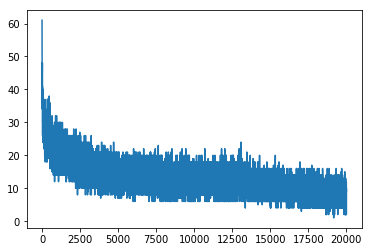

[ 10.25554091   0.99285196 -18.42384305  13.62348203  -4.43494526
   2.94569703 -14.84216234  -5.86300234   4.90957553   4.03671068
   2.76769372   9.07789556  -4.86386763  -3.09562271   3.26184077
  -2.67829847  -4.60474365   4.55715632   3.04246326  -3.63137072
   2.66847103   2.76279923  -3.35842262   8.61914899  -3.00451913
  -4.21600031   4.35410498  -3.92364524   4.06210838   3.22351534
  -8.28660439   4.9737095    2.3225559   -3.91273472   2.56831157
  -3.41536126  -2.31179907  -0.74568702   4.74141846  -7.08611164
   3.40316511  -0.80305366   6.93953727  -4.00781495   4.65296643
   4.14044335 -10.59382335  19.69772561   8.17311467 -18.44556381
  20.51902235   6.92069463   9.19630833  11.13133877  -8.09356805
  -2.97476871  -1.7958494    3.52291584   7.14118504   6.23111248
  -6.18388135]


In [29]:

class Neuron:
    
    # Constructor
    
    def __init__(self, n_inputs, lRate):
        self.lRate = lRate
        self.weights = np.random.rand(n_inputs + 1) * 0.2 - 0.1 # Num. features + 1 (bias)
    
    # Prediction

    def predict(self, inputs):
        activation = np.dot(np.append(inputs, 1.0), self.weights)
        return 1.0 if activation >= 0.0 else 0.0

    # Learn

    def learn(self, trainingSet, nEpoch):
        #weights = np.random.rand(61) * 0.2 - 0.1 # Num. features + 1 (bias)
        error_list = []
        for epoch in range(nEpoch):
            sumError = 0.0
            for row in trainingSet:
                prediction = self.predict(row[0:-1])
                error = row[-1] - prediction
                sumError += error ** 2
                self.weights = self.weights + self.lRate * error * np.append(row[0:-1], 1.0)
            error_list.append(sumError)
            print ('Epoch %d Error: %.3f' % (epoch+1,sumError))
        plt.plot(error_list)
        plt.show()
        return self.weights

# Main (Single neuron Perceptron)

data    = np.array(train_df)
lRate   = 0.05
nEpoch  = 20000
n_inputs = len(data[0, :-1])
perceptron = Neuron(n_inputs, lRate)

weights = perceptron.learn(data, nEpoch)

print (weights)